
# **AgriZen (Agriculture + Zen = peaceful smart farming)**

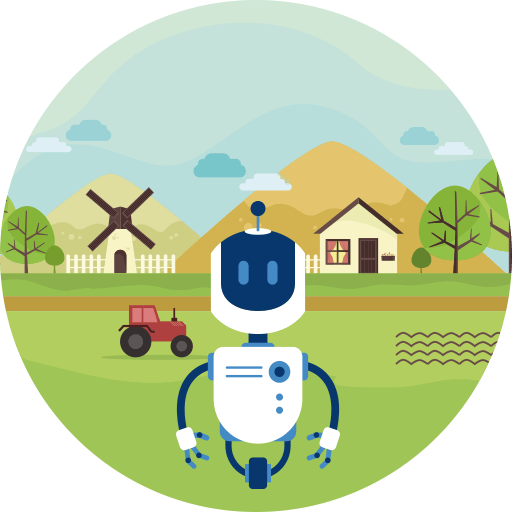

### **🎯 Here are 4 Project Ideas you can build on:**

### **1. Smart Crop Planner**

**Agents:**

Farmer Advisor

Market Researcher

Weather Forecaster


**Workflow:**


Farmer inputs land info, financial goals.

Weather agent pulls upcoming rainfall/temperature data.

Market agent suggests crops based on future demand + weather suitability.

Advisor finalizes a "Smart Planting Plan" considering water-efficient and eco-friendly options.


### **2. Precision Irrigation Scheduler**

**Agents:**

Weather Station

Soil Monitoring Agent

Farmer Notification Bot

**Workflow:**

Weather Station predicts rainfall chances.

Soil Agent evaluates current soil moisture.

Farmer Bot recommends optimal watering schedules.

Goal: Save water, prevent over-irrigation, and reduce costs.


### **3. Sustainable Farming Advisor**

**Agents:**

Farmer Advisor

Agricultural Expert

**Workflow:**

Advisor collects data on farming practices.

Expert suggests low-carbon footprint techniques (e.g., crop rotation, organic fertilizers).

Advisor sends custom plans back to farmer.

Goal: Reduce soil erosion, promote organic methods.


### **4. Eco-friendly Pest Control Planner**

**Agents:**

Pest Monitoring System

Agricultural Expert

Farmer Communication Bot


**Workflow:**

Pest Agent detects likely outbreaks (using historical + weather data).

Expert suggests eco-friendly treatments.

Farmer Bot sends alerts and guides.

Goal: Minimize pesticide use.

In [3]:
!pip install pandas matplotlib scikit-learn


In [4]:
# Install packages if needed
!pip install pandas sqlite3 matplotlib scikit-learn

ERROR: Could not find a version that satisfies the requirement sqlite3 (from versions: none)
ERROR: No matching distribution found for sqlite3


In [5]:
# Import common libraries
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Load datasets
farmer_df = pd.read_csv('./farmer_advisor_dataset.csv')
market_df = pd.read_csv('./market_researcher_dataset.csv')

# Connect to SQLite (memory for now, file-based later)
conn = sqlite3.connect('agriculture_memory.db')
cursor = conn.cursor()

# Create simple tables for memory
cursor.execute('''CREATE TABLE IF NOT EXISTS farmer_info (
                    id INTEGER PRIMARY KEY AUTOINCREMENT,
                    land_size REAL,
                    crop_preference TEXT,
                    financial_goal TEXT
                )''')

cursor.execute('''CREATE TABLE IF NOT EXISTS market_info (
                    id INTEGER PRIMARY KEY AUTOINCREMENT,
                    region TEXT,
                    crop TEXT,
                    price REAL,
                    demand_score REAL
                )''')

# Insert sample data (if needed)
farmer_df.to_sql('farmer_info', conn, if_exists='replace', index=False)
market_df.to_sql('market_info', conn, if_exists='replace', index=False)

print("Setup complete ✅")


Setup complete ✅


In [9]:
import pandas as pd

# Load Farmer Advisor Dataset
farmer_df = pd.read_csv('./farmer_advisor_dataset.csv')

# FIX: Remove spaces from column headers
farmer_df.columns = farmer_df.columns.str.strip()

# Check columns
print(farmer_df.columns.tolist())


['Farm_ID', 'Soil_pH', 'Soil_Moisture', 'Temperature_C', 'Rainfall_mm', 'Crop_Type', 'Fertilizer_Usage_kg', 'Pesticide_Usage_kg', 'Crop_Yield_ton', 'Sustainability_Score']


In [10]:
# 1. Install missing libraries if needed
!pip install pandas

# 2. Import libraries
import pandas as pd

# 3. Load datasets
farmer_df = pd.read_csv('./farmer_advisor_dataset.csv')
market_df = pd.read_csv('./market_researcher_dataset.csv')

# 4. Clean columns
farmer_df.columns = farmer_df.columns.str.strip()
market_df.columns = market_df.columns.str.strip()

# 5. Preview data
print(farmer_df.head())
print(market_df.head())


   Farm_ID   Soil_pH  Soil_Moisture  Temperature_C  Rainfall_mm Crop_Type  \
0        1  7.073643      49.145359      26.668157   227.890912     Wheat   
1        2  6.236931      21.496115      29.325342   244.017493   Soybean   
2        3  5.922335      19.469042      17.666414   141.110521      Corn   
3        4  6.845120      27.974234      17.188722   156.785663     Wheat   
4        5  6.934171      33.637679      23.603899    77.859362      Corn   

   Fertilizer_Usage_kg  Pesticide_Usage_kg  Crop_Yield_ton  \
0           131.692844            2.958215        1.576920   
1           136.370492           19.204770        3.824686   
2            99.725210           11.041066        1.133198   
3           194.832396            8.806271        8.870540   
4            57.271267            3.747553        8.779317   

   Sustainability_Score  
0             51.913649  
1             47.159077  
2             50.148418  
3             89.764557  
4             51.033941  
   Marke

### **🚀 Project 1: Smart Crop Recommender (based on soil + weather)**

In [11]:
# Smart Crop Recommender

def recommend_crop(soil_ph, soil_moisture, temperature, rainfall):
    # Filter crops that match soil and weather conditions
    recommended = farmer_df[
        (farmer_df['Soil_pH'].between(soil_ph - 0.5, soil_ph + 0.5)) &
        (farmer_df['Soil_Moisture'].between(soil_moisture - 10, soil_moisture + 10)) &
        (farmer_df['Temperature_C'].between(temperature - 5, temperature + 5)) &
        (farmer_df['Rainfall_mm'].between(rainfall - 50, rainfall + 50))
    ]

    if not recommended.empty:
        print("✅ Recommended Crops based on your soil and climate:")
        print(recommended[['Crop_Type', 'Crop_Yield_ton', 'Sustainability_Score']])
    else:
        print("⚠️ No perfect matches found, suggest soil treatment first!")

# Example usage
recommend_crop(soil_ph=6.5, soil_moisture=30, temperature=25, rainfall=200)


✅ Recommended Crops based on your soil and climate:
     Crop_Type  Crop_Yield_ton  Sustainability_Score
1      Soybean        3.824686             47.159077
28        Corn        5.608641              5.660228
57     Soybean        4.409318             30.991961
81     Soybean        7.131185             99.994545
95        Corn        8.086100             70.955427
...        ...             ...                   ...
9948     Wheat        1.250311             43.536288
9957   Soybean        9.898807             24.305237
9960     Wheat        3.670012             82.884544
9982     Wheat        2.993627             70.865832
9989      Corn        5.314738             13.241035

[499 rows x 3 columns]


### **🚀 Project 2: Precision Fertilizer Optimizer**

In [12]:
# Fertilizer Optimizer

def suggest_fertilizer_usage(crop_type):
    # Find average fertilizer usage for this crop
    crop_data = farmer_df[farmer_df['Crop_Type'] == crop_type]

    if not crop_data.empty:
        avg_fertilizer = crop_data['Fertilizer_Usage_kg'].mean()
        avg_pesticide = crop_data['Pesticide_Usage_kg'].mean()
        print(f"🌱 For {crop_type}, use around {avg_fertilizer:.2f} kg fertilizer and {avg_pesticide:.2f} kg pesticide per acre for optimal yield.")
    else:
        print("⚠️ Crop type not found in database.")

# Example usage
suggest_fertilizer_usage('Soybean')


🌱 For Soybean, use around 124.21 kg fertilizer and 10.54 kg pesticide per acre for optimal yield.


### **🚀 Project 3: Sustainability Score Predictor (Simple ML Model)**

In [13]:
# Sustainability Score Prediction (ML)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Prepare data
X = farmer_df[['Soil_pH', 'Soil_Moisture', 'Temperature_C', 'Rainfall_mm', 'Fertilizer_Usage_kg', 'Pesticide_Usage_kg']]
y = farmer_df['Sustainability_Score']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
predictions = model.predict(X_test)

# Evaluate
from sklearn.metrics import mean_squared_error
print(f"🧪 Model Test MSE: {mean_squared_error(y_test, predictions):.2f}")

# Predict Sustainability for a new farm
def predict_sustainability(soil_ph, soil_moisture, temp, rainfall, fertilizer, pesticide):
    input_features = [[soil_ph, soil_moisture, temp, rainfall, fertilizer, pesticide]]
    predicted_score = model.predict(input_features)
    print(f"🔮 Predicted Sustainability Score: {predicted_score[0]:.2f}")

# Example usage
predict_sustainability(6.5, 30, 26, 220, 120, 5)


🧪 Model Test MSE: 832.04
🔮 Predicted Sustainability Score: 50.80


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


### **🚀 Project 4: Multi-Agent System Simulation**

In [16]:
# Install pandas if needed
!pip install pandas --quiet

# Import
import pandas as pd

# Load datasets
farmer_df = pd.read_csv('/content/farmer_advisor_dataset.csv')
market_df = pd.read_csv('/content/market_researcher_dataset.csv')

# Clean column names
farmer_df.columns = farmer_df.columns.str.strip()
market_df.columns = market_df.columns.str.strip()

# Show to verify
print("Farmer dataset columns:", farmer_df.columns.tolist())
print("Market dataset columns:", market_df.columns.tolist())

# Farmer Class
class Farmer:
    def __init__(self, soil_ph, moisture, temp, rainfall):
        self.soil_ph = soil_ph
        self.moisture = moisture
        self.temp = temp
        self.rainfall = rainfall

    def analyze_conditions(self):
        print("\nAnalyzing soil and climate conditions...\n")
        recommended = farmer_df[
            (farmer_df['Soil_pH'].between(self.soil_ph - 0.5, self.soil_ph + 0.5)) &
            (farmer_df['Soil_Moisture'].between(self.moisture - 5, self.moisture + 5)) &
            (farmer_df['Temperature_C'].between(self.temp - 2, self.temp + 2)) &
            (farmer_df['Rainfall_mm'].between(self.rainfall - 50, self.rainfall + 50))
        ]
        print("✅ Recommended Crops based on your soil and climate:")
        print(recommended[['Crop_Type', 'Crop_Yield_ton', 'Sustainability_Score']])
        return recommended[['Crop_Type', 'Crop_Yield_ton', 'Sustainability_Score']]

# Market Researcher Class
class MarketResearcher:
    def suggest_profitable_crop(self):
        print("\nChecking profitable crops from market data...\n")
        # Correct columns: 'Market_Price_per_ton' and 'Demand_Index'
        best_crops = market_df.sort_values(
            ['Market_Price_per_ton', 'Demand_Index'],
            ascending=[False, False]
        ).head(5)
        print("✅ Top profitable crops in the market:")
        print(best_crops[['Product', 'Market_Price_per_ton', 'Demand_Index']])
        return best_crops[['Product', 'Market_Price_per_ton', 'Demand_Index']]

# Agricultural Advisor Class
class AgriculturalAdvisor:
    def give_recommendations(self, farmer, market_researcher):
        soil_crops = farmer.analyze_conditions()
        market_crops = market_researcher.suggest_profitable_crop()

        # Find common crops between soil recommendation and market demand
        common_crops = set(soil_crops['Crop_Type']).intersection(set(market_crops['Product']))

        if common_crops:
            print("\n✅ Final recommended crops (good soil + profitable market):")
            for crop in common_crops:
                print(f"👉 {crop}")
        else:
            print("\n⚠️ No common crops found between soil conditions and market profitability.")

# --- Main program ---

# Instantiate agents
farmer = Farmer(soil_ph=6.5, moisture=30, temp=25, rainfall=200)
market_researcher = MarketResearcher()
advisor = AgriculturalAdvisor()

# Give recommendations
advisor.give_recommendations(farmer, market_researcher)


Farmer dataset columns: ['Farm_ID', 'Soil_pH', 'Soil_Moisture', 'Temperature_C', 'Rainfall_mm', 'Crop_Type', 'Fertilizer_Usage_kg', 'Pesticide_Usage_kg', 'Crop_Yield_ton', 'Sustainability_Score']
Market dataset columns: ['Market_ID', 'Product', 'Market_Price_per_ton', 'Demand_Index', 'Supply_Index', 'Competitor_Price_per_ton', 'Economic_Indicator', 'Weather_Impact_Score', 'Seasonal_Factor', 'Consumer_Trend_Index']

Analyzing soil and climate conditions...

✅ Recommended Crops based on your soil and climate:
     Crop_Type  Crop_Yield_ton  Sustainability_Score
455       Corn        5.052704             73.977233
529      Wheat        6.308092             89.889262
550      Wheat        5.798382             36.719697
552    Soybean        5.200880             72.147813
573       Corn        9.930380             51.117552
...        ...             ...                   ...
9644      Rice        3.487070             99.488630
9808   Soybean        8.145853             26.825318
9835      

## **🌾 1. Add a Fertilizer and Pesticide Advisor**

In [17]:
class FertilizerAdvisor:
    def suggest_usage(self, crop_type):
        avg_fertilizer = farmer_df[farmer_df['Crop_Type'] == crop_type]['Fertilizer_Usage_kg'].mean()
        avg_pesticide = farmer_df[farmer_df['Crop_Type'] == crop_type]['Pesticide_Usage_kg'].mean()
        print(f"🌿 For {crop_type}:")
        print(f"Recommended Fertilizer Usage: {avg_fertilizer:.2f} kg/acre")
        print(f"Recommended Pesticide Usage: {avg_pesticide:.2f} kg/acre")


In [18]:
fertilizer_advisor = FertilizerAdvisor()
fertilizer_advisor.suggest_usage('Corn')


🌿 For Corn:
Recommended Fertilizer Usage: 125.97 kg/acre
Recommended Pesticide Usage: 10.32 kg/acre


### **📈 2. Predict Best Yield Crop (Simple ML using Linear Regression)**

In [19]:
from sklearn.linear_model import LinearRegression

class YieldPredictor:
    def __init__(self):
        features = ['Soil_pH', 'Soil_Moisture', 'Temperature_C', 'Rainfall_mm']
        X = farmer_df[features]
        y = farmer_df['Crop_Yield_ton']
        self.model = LinearRegression()
        self.model.fit(X, y)

    def predict_yield(self, soil_ph, moisture, temp, rainfall):
        input_data = [[soil_ph, moisture, temp, rainfall]]
        predicted_yield = self.model.predict(input_data)[0]
        print(f"🌾 Predicted Crop Yield: {predicted_yield:.2f} tons per acre")


In [20]:
yield_predictor = YieldPredictor()
yield_predictor.predict_yield(soil_ph=6.5, moisture=30, temp=25, rainfall=100)


🌾 Predicted Crop Yield: 5.50 tons per acre


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## **🧠 3. Crop Sustainability Recommender**

In [21]:
class SustainabilityAdvisor:
    def recommend_sustainable_crops(self):
        sustainable = farmer_df[farmer_df['Sustainability_Score'] > 70]
        print("♻️ Sustainable Crops to Focus On:")
        print(sustainable[['Crop_Type', 'Crop_Yield_ton', 'Sustainability_Score']].drop_duplicates())


In [22]:
sustainability_advisor = SustainabilityAdvisor()
sustainability_advisor.recommend_sustainable_crops()


♻️ Sustainable Crops to Focus On:
     Crop_Type  Crop_Yield_ton  Sustainability_Score
3        Wheat        8.870540             89.764557
6      Soybean        6.177211             88.868698
8        Wheat        7.801282             80.164068
9      Soybean        6.221388             82.929120
11        Corn        2.847877             92.394888
...        ...             ...                   ...
9988   Soybean        9.333271             92.586859
9990   Soybean        7.653357             80.644929
9991     Wheat        9.589256             88.723745
9996      Rice        9.791433             96.561580
9999     Wheat        5.231007             76.320866

[2990 rows x 3 columns]


## **💹 4. Market Trend Analyzer**

In [23]:
class MarketTrendAnalyzer:
    def top_trending_crops(self):
        trending = market_df.sort_values('Demand_Index', ascending=False).head(5)
        print("📈 Top Trending Crops:")
        print(trending[['Product', 'Demand_Index', 'Market_Price_per_ton']])



In [24]:
trend_analyzer = MarketTrendAnalyzer()
trend_analyzer.top_trending_crops()


📈 Top Trending Crops:
      Product  Demand_Index  Market_Price_per_ton
9972     Corn    199.997449            257.800449
1330  Soybean    199.981624            141.790444
5064     Corn    199.973826            374.473109
8010     Corn    199.971960            454.792152
8937     Corn    199.959501            404.720851


### **🌟 5. Interactive Chatbot Mode**

In [25]:
def interactive_advisor():
    soil_ph = float(input("Enter Soil pH (e.g., 6.5): "))
    moisture = float(input("Enter Soil Moisture (%): "))
    temp = float(input("Enter Temperature (°C): "))
    rainfall = float(input("Enter Rainfall (mm): "))

    farmer = Farmer(soil_ph, moisture, temp, rainfall)
    recommendations = farmer.analyze_conditions()

    if not recommendations.empty:
        print("\n✅ Based on your conditions, recommended crops are:")
        print(recommendations['Crop_Type'].unique())
    else:
        print("⚠️ No exact match found, consider adjusting farming parameters.")
